## Лабораторная работа №1
### Задание
### Вариант №7
### Вид классов: `moons`
### Random state: `77`
### noise: `0.25`

In [23]:
# Модуль numpy (сокращение от "Numerical Python") предоставляет функциональность для эффективной работы
# с массивами и математическими операциями на ними.
import numpy as np

# Модуль matplotlib.pyplot используется для создания графиков и визуализации данных.
# Он предоставляет множество функций для построения различных типов графиков.
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [24]:
# А для отображения на графике области принятия решения - готовую функцию plot_2d_separator,
# которой нужно передать на вход объект classifier – модель классификатора и X – массив входных данных:
def plot_2d_separator(classifier, X, fill=False, line=True, ax=None, eps=None):
    if eps is None:
        eps = 1.0
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)
    x1, x2 = np.meshgrid(xx, yy)
    X_grid = np.c_[x1.ravel(), x2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]

    if ax is None:
        ax = plt.gca()
    if fill:
        ax.contourf(x1, 
                    x2, 
                    decision_values.reshape(x1.shape), 
                    levels=fill_levels, 
                    colors=['cyan', 'pink', 'yellow'])
    if line:
        ax.contour(x1, 
                   x2, 
                   decision_values.reshape(x1.shape), 
                   levels=levels, 
                   colors='black')

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

### Генерация выборки

In [25]:
X, y = make_moons(n_samples=1000, shuffle=True, noise=0.25, random_state=77)

In [26]:
print('Координаты точек: ')
print(X[:15])
print('Метки класса: ')
print(y[:15])

Координаты точек: 
[[ 0.3877582   0.83132146]
 [ 0.75917445  0.37546408]
 [ 0.16596943  1.06109846]
 [ 2.23428045  0.2359786 ]
 [-0.89666798  1.0952051 ]
 [ 0.94876632  0.31861216]
 [-0.81661113  0.04043469]
 [ 0.02592078  0.16408361]
 [-0.92023208  0.20859127]
 [ 0.27797801  0.63569972]
 [ 0.83512001  0.62834727]
 [ 0.0828706  -0.14748687]
 [ 0.15418065  0.92032556]
 [-0.39249897  1.18232379]
 [ 1.19731795 -0.30376657]]
Метки класса: 
[0 0 0 1 0 0 0 1 0 0 0 1 0 0 1]


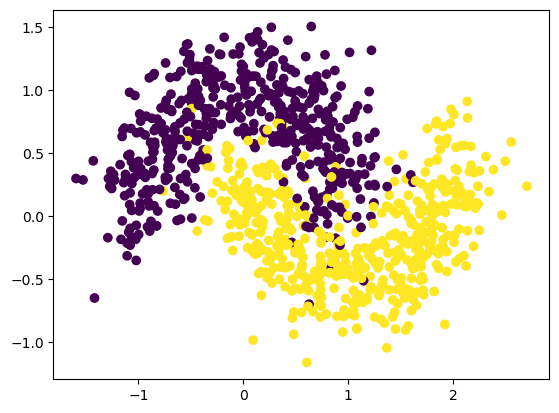

In [27]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

### Разбитие выборки на обучающее и тестовое множество (90/10)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.10,
                                                    random_state=77)

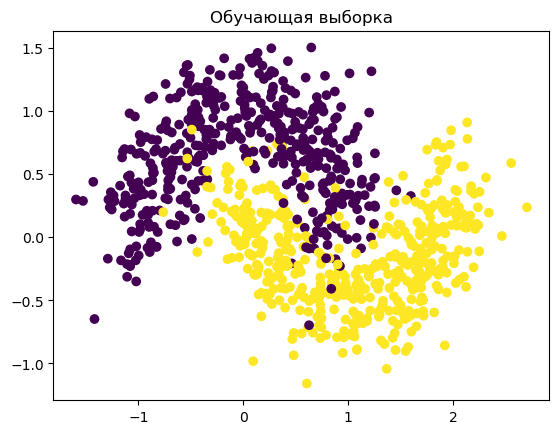

In [29]:
plt.title('Обучающая выборка')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

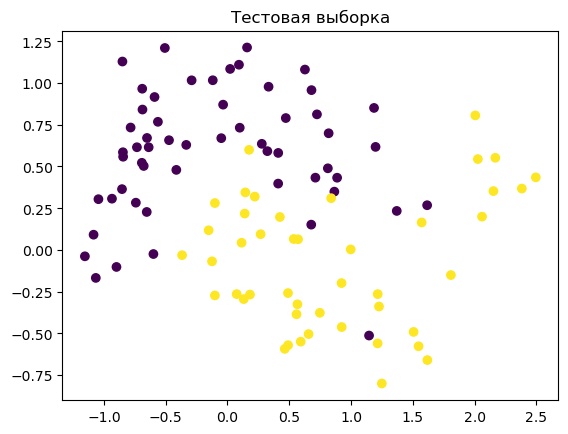

In [30]:
plt.title('Тестовая выборка')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.show()

### Классификация

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [32]:
def show_info(classifier, classifier_name, real_values, prediction_values):
    print(f'Метод классификации: {classifier_name}\n')

    # Выводим предсказанное и реальное значение
    print('Предсказанные и реальные значения:')
    print(prediction_values)
    print(real_values)

    # Выводим матрицу неточностей
    print('\nМатрица неточностей')
    print(confusion_matrix(real_values, prediction_values))

    # Выводим точность классификации
    print(f'\nТочность классификации: {accuracy_score(prediction_values, real_values)}')

    # Выводим полноту
    print('\nПолнота: ')
    print(classification_report(real_values, prediction_values))

    # AUC ROC
    print(f'\nПлощадь под кривой: {roc_auc_score(real_values, prediction_values)}')

    plt.xlabel('Первый класс')
    plt.ylabel('Второй класс')
    plt.title(classifier_name.upper())
    plot_2d_separator(classifier, X, fill=True)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

### Метод k-ближайших соседей (1)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

Метод классификации: ближайшие соседи (1)

Предсказанные и реальные значения:
[1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1]
[1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1
 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1]

Матрица неточностей
[[52  3]
 [ 4 41]]

Точность классификации: 0.93

Полнота: 
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        55
           1       0.93      0.91      0.92        45

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Площадь под кривой: 0.9282828282828283


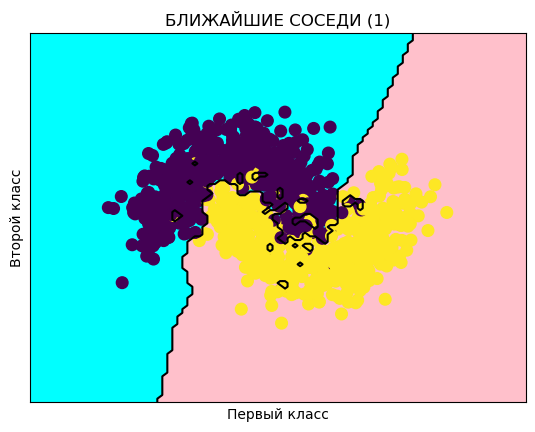

In [34]:
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')

# Обучаем модель данных
knn.fit(X_train, y_train)

# Оцениваем качество модели
prediction = knn.predict(X_test)

# Выводим сводную информацию
show_info(knn, 'ближайшие соседи (1)', y_test, prediction)

### Метод k-ближайших соседей (3)

Метод классификации: ближайшие соседи (3)

Предсказанные и реальные значения:
[1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1]
[1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1
 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1]

Матрица неточностей
[[52  3]
 [ 4 41]]

Точность классификации: 0.93

Полнота: 
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        55
           1       0.93      0.91      0.92        45

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Площадь под кривой: 0.9282828282828283


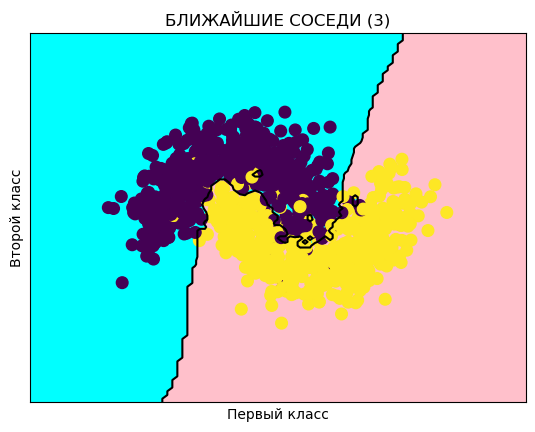

In [35]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

# Обучаем модель данных
knn.fit(X_train, y_train)

# Оцениваем качество модели
prediction = knn.predict(X_test)

# Выводим сводную информацию
show_info(knn, 'ближайшие соседи (3)', y_test, prediction)

### Метод k-ближайших соседей (5)

Метод классификации: ближайшие соседи (5)

Предсказанные и реальные значения:
[1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1]
[1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1
 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1]

Матрица неточностей
[[51  4]
 [ 3 42]]

Точность классификации: 0.93

Полнота: 
              precision    recall  f1-score   support

           0       0.94      0.93      0.94        55
           1       0.91      0.93      0.92        45

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Площадь под кривой: 0.9303030303030303


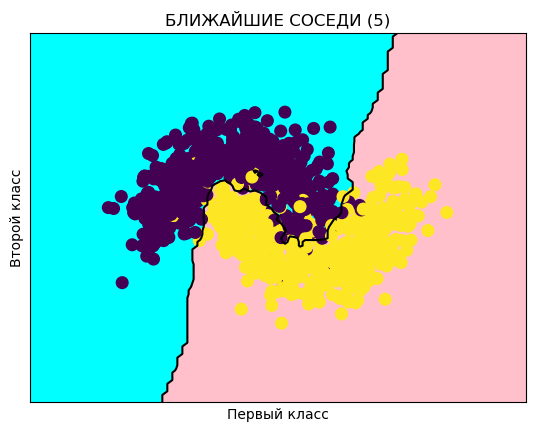

In [36]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Обучаем модель данных
knn.fit(X_train, y_train)

# Оцениваем качество модели
prediction = knn.predict(X_test)

# Выводим сводную информацию
show_info(knn, 'ближайшие соседи (5)', y_test, prediction)

### Метод k-ближайших соседей (9)

Метод классификации: ближайшие соседи (9)

Предсказанные и реальные значения:
[1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1]
[1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1
 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1]

Матрица неточностей
[[52  3]
 [ 3 42]]

Точность классификации: 0.94

Полнота: 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        55
           1       0.93      0.93      0.93        45

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100


Площадь под кривой: 0.9393939393939394


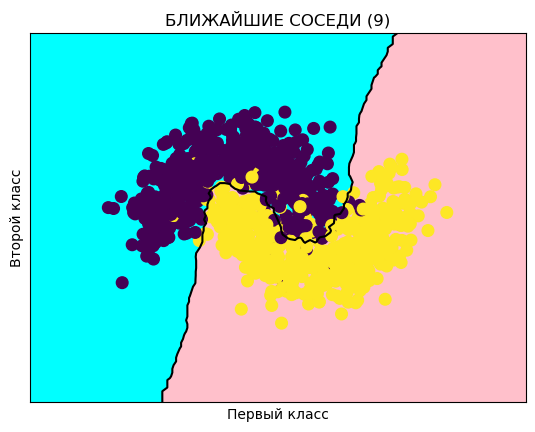

In [37]:
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')

# Обучаем модель данных
knn.fit(X_train, y_train)

# Оцениваем качество модели
prediction = knn.predict(X_test)

# Выводим сводную информацию
show_info(knn, 'ближайшие соседи (9)', y_test, prediction)

## Наивный байесовский классификатор

Метод классификации: Наивный байесовский классификатор

Предсказанные и реальные значения:
[1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1
 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1
 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1]
[1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1
 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1]

Матрица неточностей
[[50  5]
 [ 7 38]]

Точность классификации: 0.88

Полнота: 
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        55
           1       0.88      0.84      0.86        45

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100


Площадь под кривой: 0.8767676767676769


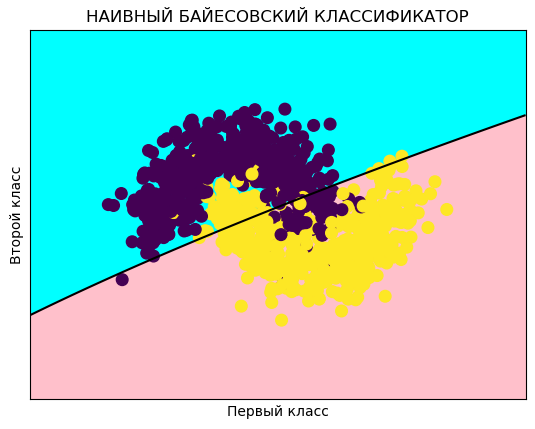

In [38]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

# Обучаем модель данных
nb.fit(X_train, y_train)

# Оцениваем качество модели
prediction = nb.predict(X_test)

# Выводим сводную информацию
show_info(nb, 'Наивный байесовский классификатор', y_test, prediction)

### Случайный лес (5)

In [39]:
from sklearn.ensemble import RandomForestClassifier

Метод классификации: случайный лес (5)

Предсказанные и реальные значения:
[1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1]
[1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1
 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1]

Матрица неточностей
[[52  3]
 [ 6 39]]

Точность классификации: 0.91

Полнота: 
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        55
           1       0.93      0.87      0.90        45

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100


Площадь под кривой: 0.9060606060606061


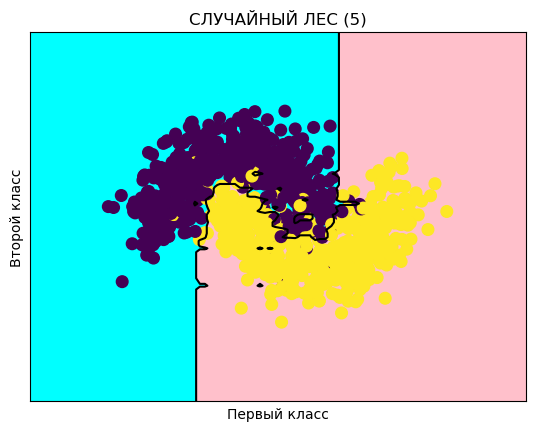

In [40]:
rfc = RandomForestClassifier(n_estimators=5)

# Обучаем модель данных
rfc.fit(X_train, y_train)

# Оцениваем качество модели
prediction = rfc.predict(X_test)

# Выводим сводную информацию
show_info(rfc, 'случайный лес (5)', y_test, prediction)

### Случайный лес (10)

Метод классификации: случайный лес (10)

Предсказанные и реальные значения:
[1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1]
[1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1
 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1]

Матрица неточностей
[[52  3]
 [ 6 39]]

Точность классификации: 0.91

Полнота: 
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        55
           1       0.93      0.87      0.90        45

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100


Площадь под кривой: 0.9060606060606061


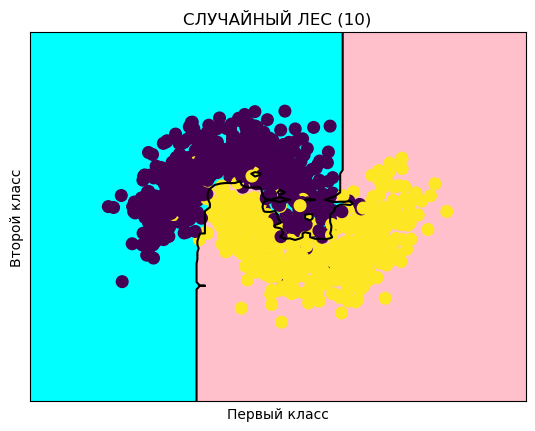

In [41]:
rfc = RandomForestClassifier(n_estimators=10)

# Обучаем модель данных
rfc.fit(X_train, y_train)

# Оцениваем качество модели
prediction = rfc.predict(X_test)

# Выводим сводную информацию
show_info(rfc, 'случайный лес (10)', y_test, prediction)

### Случайный лес (15)

Метод классификации: случайный лес (15)

Предсказанные и реальные значения:
[1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1]
[1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1
 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1]

Матрица неточностей
[[52  3]
 [ 5 40]]

Точность классификации: 0.92

Полнота: 
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        55
           1       0.93      0.89      0.91        45

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100


Площадь под кривой: 0.9171717171717172


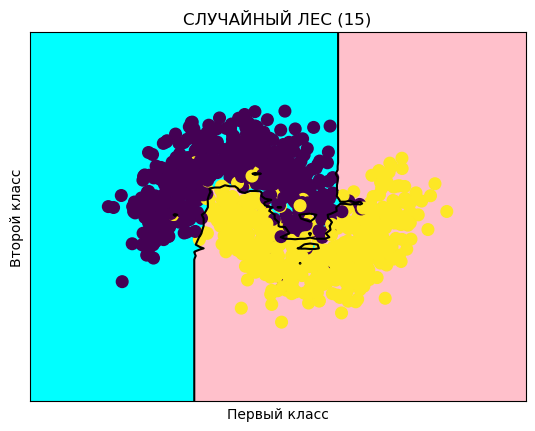

In [42]:
rfc = RandomForestClassifier(n_estimators=15)

# Обучаем модель данных
rfc.fit(X_train, y_train)

# Оцениваем качество модели
prediction = rfc.predict(X_test)

# Выводим сводную информацию
show_info(rfc, 'случайный лес (15)', y_test, prediction)

### Случайный лес (20)

Метод классификации: случайный лес (20)

Предсказанные и реальные значения:
[1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1]
[1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1
 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1]

Матрица неточностей
[[52  3]
 [ 3 42]]

Точность классификации: 0.94

Полнота: 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        55
           1       0.93      0.93      0.93        45

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100


Площадь под кривой: 0.9393939393939394


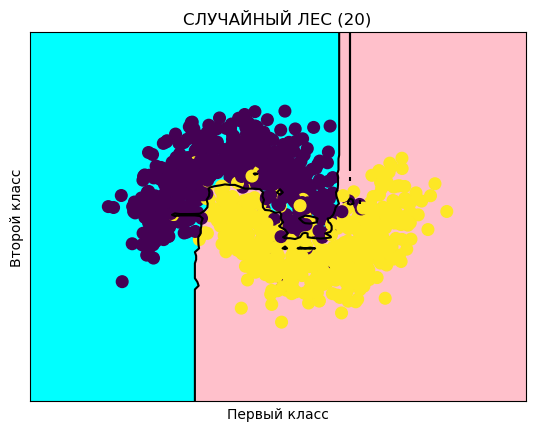

In [43]:
rfc = RandomForestClassifier(n_estimators=20)

# Обучаем модель данных
rfc.fit(X_train, y_train)

# Оцениваем качество модели
prediction = rfc.predict(X_test)

# Выводим сводную информацию
show_info(rfc, 'случайный лес (20)', y_test, prediction)

### Случайный лес (50)

Метод классификации: случайный лес (50)

Предсказанные и реальные значения:
[1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1]
[1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1
 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1]

Матрица неточностей
[[52  3]
 [ 3 42]]

Точность классификации: 0.94

Полнота: 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        55
           1       0.93      0.93      0.93        45

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100


Площадь под кривой: 0.9393939393939394


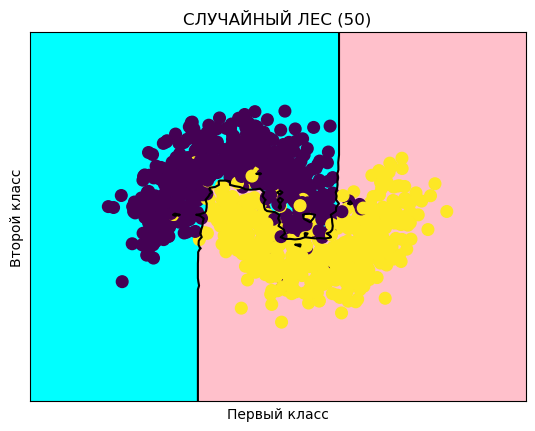

In [44]:
rfc = RandomForestClassifier(n_estimators=50)

# Обучаем модель данных
rfc.fit(X_train, y_train)

# Оцениваем качество модели
prediction = rfc.predict(X_test)

# Выводим сводную информацию
show_info(rfc, 'случайный лес (50)', y_test, prediction)